In [25]:
import numpy as np
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator


# Dataframe voitures vertes par pays

In [26]:

df_voit_eur = pd.read_excel("C:/Users/angel/OneDrive/Franca2022/POEC-Global-knowledge/pprojeto/github/tables/flat_table_external_GVW.xlsx", sheet_name= "F_Sales_EUR_country_green")
df_voit_eur

,EU Country,Powersource,Year,Sales
0,Austria,ALL,2018,NaN
1,Austria,ALL,2019,329363.0
2,Austria,ALL,2020,248740.0
3,Austria,ALL,2021,239803.0
4,Austria,ALL,2022,215050.0
...,...,...,...,...
445,United Kingdom,PHEV,2018,44437.0
446,United Kingdom,PHEV,2019,34984.0
447,United Kingdom,PHEV,2020,66877.0
448,United Kingdom,PHEV,2021,114554.0


In [27]:
df_all_eur = df_voit_eur[df_voit_eur['Powersource'] == 'ALL'].drop('Powersource', axis=1)
df_bev_eur = df_voit_eur[df_voit_eur['Powersource'] == 'BEV'].drop('Powersource', axis=1)

# Se os DataFrames não estiverem no formato longo, você terá que derretê-los como mostrado anteriormente
# ...

# Ajustando os índices para garantir que eles correspondam para a operação de divisão
# Certifique-se de que 'Year' já é uma coluna e que você não precisa derreter o DataFrame novamente
df_all_eur.set_index(['EU Country', 'Year'], inplace=True)
df_bev_eur.set_index(['EU Country', 'Year'], inplace=True)

# Calculando a porcentagem de BEV
df_percentage_bev = (df_bev_eur['Sales'] / df_all_eur['Sales'])
df_percentage_bev = df_percentage_bev.reset_index()
df_percentage_bev.columns = ['EU Country', 'Year', 'BEV Percentage']

# Exibindo o DataFrame resultante
df_percentage_bev

,EU Country,Year,BEV Percentage
0,Austria,2018,NaN
1,Austria,2019,0.028118
2,Austria,2020,0.064268
3,Austria,2021,0.139198
4,Austria,2022,0.158935
...,...,...,...
145,United Kingdom,2018,NaN
146,United Kingdom,2019,0.016377
147,United Kingdom,2020,0.066340
148,United Kingdom,2021,0.115790


In [28]:
#Création de dataframes uniquement PHEV et ALL

df_phev_eur = df_voit_eur[df_voit_eur['Powersource'] == 'PHEV'].drop('Powersource', axis=1)
df_all_eur = df_voit_eur[df_voit_eur['Powersource'] == 'ALL'].drop('Powersource', axis=1)

df_all_eur.set_index(['EU Country', 'Year'], inplace=True)
df_phev_eur.set_index(['EU Country', 'Year'], inplace=True)

#Calcul de pourcentage de vehicules PHEV
df_percentage_phev = (df_phev_eur['Sales'] / df_all_eur['Sales'])
df_percentage_phev = df_percentage_phev.reset_index()
df_percentage_phev.columns = ['EU Country', 'Year', 'PHEV Percentage']

# Exibindo o DataFrame resultante
df_percentage_phev

,EU Country,Year,PHEV Percentage
0,Austria,2018,NaN
1,Austria,2019,0.006546
2,Austria,2020,0.030683
3,Austria,2021,0.060992
4,Austria,2022,0.061697
...,...,...,...
145,United Kingdom,2018,NaN
146,United Kingdom,2019,0.015137
147,United Kingdom,2020,0.041002
148,United Kingdom,2021,0.069545


# Total bev allemagne

In [29]:
###Total bev Allemagne
df_bev_total_germany = df_percentage_bev[df_percentage_bev['EU Country'] == 'Germany']

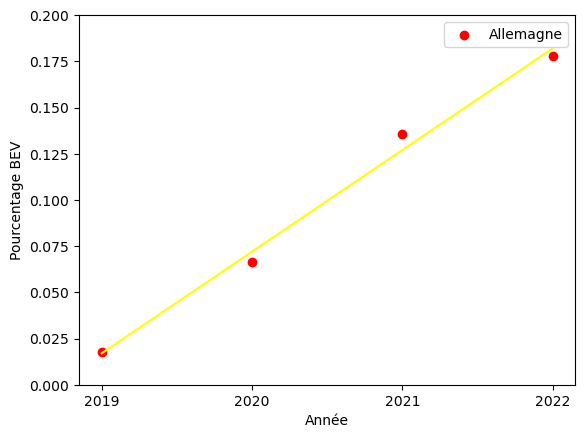

Slope (GER): 0.05498535200439662
R² (GER): 0.9917096097813028


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

x = np.array([2019, 2020, 2021, 2022])
y_total_ger = df_bev_total_germany.iloc[1:,2].to_numpy()   

slope_total_ger, intercept_total_ger, r_value_total_ger, p_value_total_ger, std_err_total_ger = linregress(x, y_total_ger)

predicted_y_total_ger = slope_total_ger * x + intercept_total_ger

plt.scatter(x, y_total_ger, label='Allemagne', color='red')  
plt.plot(x, predicted_y_total_ger, color='yellow') 

plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.ylim(0,0.2)

plt.xlabel('Année')
plt.ylabel('Pourcentage BEV')
plt.legend()
plt.show()

print(f"Slope (GER): {slope_total_ger}")
print(f"R² (GER): {r_value_total_ger**2}")


In [31]:
predicted_y_total_ger = slope_total_ger * x + intercept_total_ger
alem_cinqu = (0.5 - intercept_total_ger)/slope_total_ger 
alem_cinqu

2027.7838601560663

# Total bev France

In [32]:
df_bev_total_france = df_percentage_bev[df_percentage_bev['EU Country'] == 'France']

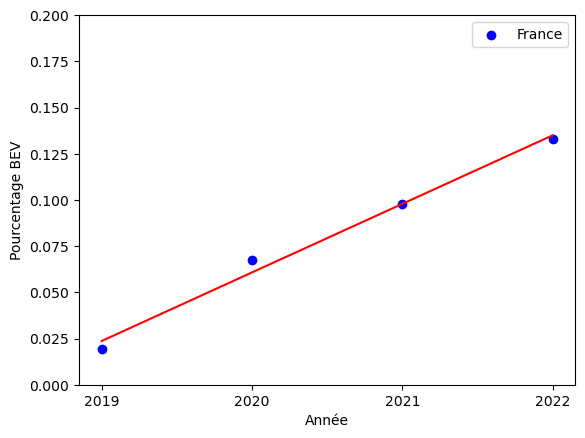

Pente (FRA): 0.03709960851548113
R² (FRA): 0.9903936483633958
-74.88044634303503


In [33]:
x = np.array([2019, 2020, 2021, 2022])
y_total_fra = df_bev_total_france.iloc[1:,2].to_numpy()   

slope_total_fra, intercept_total_fra, r_value_total_fra, p_value_total_fra, std_err_total_fra = linregress(x, y_total_fra)

predicted_y_total_fra = slope_total_fra * x + intercept_total_fra

#plt.text(7.8, 12.5, "I am Adding Text To The Plot")


plt.scatter(x, y_total_fra, label='France', color='blue')  
plt.plot(x, predicted_y_total_fra, color='red') 

plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))


plt.ylim(0,0.2)

plt.xlabel('Année')
plt.ylabel('Pourcentage BEV')
plt.legend()
plt.show()


print(f"Pente (FRA): {slope_total_fra}")
print(f"R² (FRA): {r_value_total_fra**2}")
print( intercept_total_fra)

In [34]:
predicted_y_total_fra = slope_total_fra * x + intercept_total_fra
ano_cinquenta = (0.5 - intercept_total_fra)/slope_total_fra
ano_cinquenta

2031.8394009893625

In [35]:
razaofr_ger=slope_total_ger/slope_total_fra
razaofr_ger

1.482100599025244

# Données de voitures vertes allemagne GVW

Ventes de 2019-2022 de voitures du groupe VW en Allemagne

In [36]:
#ventes groupe VW
df_gvw_ger = pd.read_excel("C:/Users/angel/OneDrive/Franca2022/POEC-Global-knowledge/pprojeto/pastas_finais/08-01-2023/voitures_vertes_allemagne.xlsx", sheet_name= "groupe_allemagne")
df_gvw_ger

,Groupe,%bev,bev,Total,Year
0,VW Group,0.009484,12453,1312987,2019
1,VW Group,0.060899,64652,1061627,2020
2,VW Group,0.117796,113005,959328,2021
3,VW Group,0.123670,121106,979266,2022


In [37]:
x = np.array([2019, 2020, 2021, 2022])


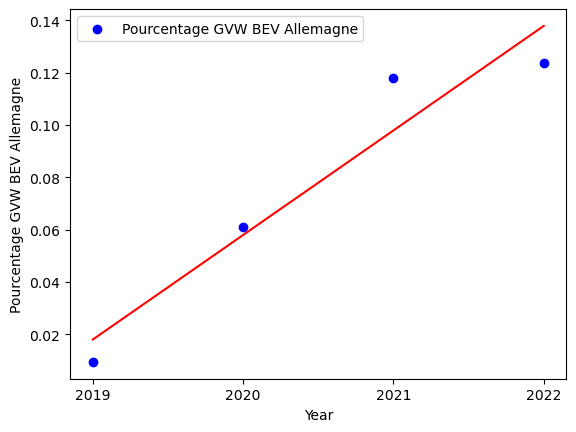

slope GVW BEV Allemagne: 0.03994541101831099
R-squared GVW BEV Allemagne: 0.9216613566576234


In [38]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

y_bev_ger = df_gvw_ger.iloc[:,1].to_numpy() 

slope_bev_ger, intercept_bev_ger, r_value_bev_ger, p_value_bev_ger, std_err_bev_ger = linregress(x, y_bev_ger)

predicted_y_bev_ger = slope_bev_ger * x + intercept_bev_ger

plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

#plt.text(-5, 60, 'Parabola $Y = x^2$', fontsize = 22) 


# Plotando os dados e a reta de regressão para BEV Alemanha
plt.scatter(x, y_bev_ger, label='Pourcentage GVW BEV Allemagne', color='blue')
plt.plot(x, predicted_y_bev_ger, color='red')
plt.xlabel('Year')
plt.ylabel('Pourcentage GVW BEV Allemagne')
plt.legend()
plt.show()

# Exibindo os resultados da regressão para BEV Alemanha
print(f"slope GVW BEV Allemagne: {slope_bev_ger}")
print(f"R-squared GVW BEV Allemagne: {r_value_bev_ger**2}")


In [40]:
correlation_coefficient = np.corrcoef(x, y_bev_ger)
correlation_coefficient

array([[1.        , 0.96003196],
       [0.96003196, 1.        ]])

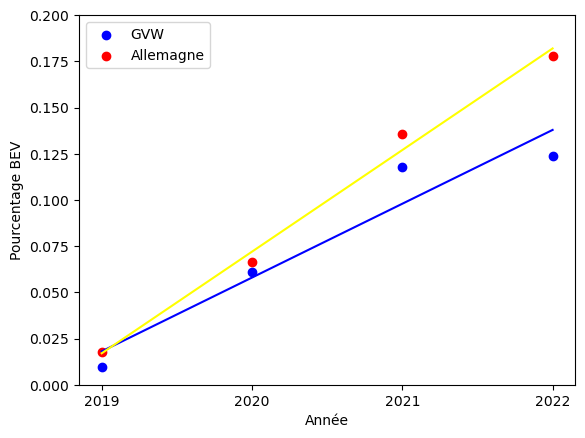

BEV Alemanha - slope: 0.03994541101831099, R-squared: 0.9216613566576234
Total Alemanha - slope: 0.05498535200439662, R-squared: 0.9917096097813028


In [41]:
import matplotlib.pyplot as plt
from scipy.stats import linregress


slope_bev_ger, intercept_bev_ger, r_value_bev_ger, p_value_bev_ger, std_err_bev_ger = linregress(x, y_bev_ger)
predicted_y_bev_ger = slope_bev_ger * x + intercept_bev_ger

slope_total_ger, intercept_total_ger, r_value_total_ger, p_value_total_ger, std_err_total_ger = linregress(x, y_total_ger)
predicted_y_total_ger = slope_total_ger * x + intercept_total_ger

# Plotando os dados de BEV na Alemanha
plt.scatter(x, y_bev_ger, label='GVW', color='blue')  # Pontos azuis
plt.plot(x, predicted_y_bev_ger, color='blue')  # Linha vermelha

# Plotando os dados totais na Alemanha
plt.scatter(x, y_total_ger, label='Allemagne', color='red')  # Pontos verdes
plt.plot(x, predicted_y_total_ger, color='yellow')  # Linha laranja

plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylim(0,0.2)


# Adicionando legendas e títulos
plt.xlabel('Année')
plt.ylabel('Pourcentage BEV')
plt.legend()
plt.show()

# Exibindo os resultados da regressão para ambos os conjuntos
print(f"BEV Allemagne - slope: {slope_bev_ger}, R-squared: {r_value_bev_ger**2}")
print(f"Total Allemagne - slope: {slope_total_ger}, R-squared: {r_value_total_ger**2}")


In [42]:
razao=slope_total_ger/slope_bev_ger
razao

1.376512360310708

In [43]:
slope_bev_ger

0.03994541101831099